In the first part of the assignment we will work with the diatoms dataset, see the appendix below for
details.

In [1]:
# import packages, data, & set figure sizes
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

dataDia = np.loadtxt('diatoms.txt')

dataToy = np.loadtxt('pca_toydata.txt')

dataOccu = np.loadtxt('occupancy_data.csv', delimiter=',')
dataOccu = dataOccu[:,:-1]

dataTrain = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
XTrain = dataTrain[:,:-1]

# Exercise 1  (Plotting cell shapes, 10 points). 
Plot one of the cells by plotting the landmark points
and interpolating between subsequent landmark points.
Next, plot all the cells on top of each other. Can you see any dataset tendencies from this plot?
When plotting, make sure to make the axes equal to get the right dimensions. If you use matplotlyb.pyplot
this can be done by typing plt.axis(’equal’).
Deliverables. A plot of a cell, a plot of many cells, and a short description

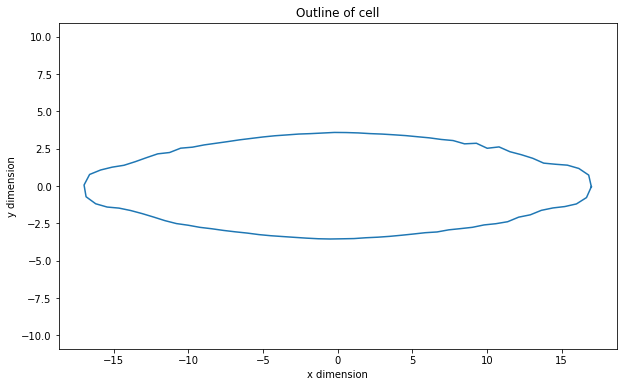

In [2]:
def plot_cell(data):
    plt.plot(np.append(data[0::2], data[0::2][0]), np.append(data[1::2], data[1::2][0]));
    plt.axis('equal')
    plt.ylabel('y dimension');
    plt.xlabel('x dimension');
    plt.title('Outline of cell')

plot_cell(dataDia[0])

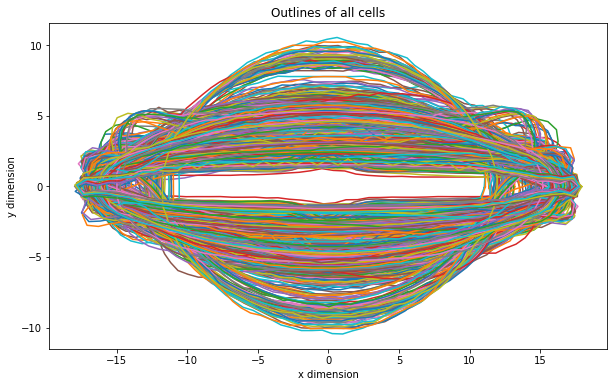

In [3]:
for cell in dataDia:
    plot_cell(cell)
plt.title('Outlines of all cells');

# TODO
short description of tendecies: looks like they're either round or very much stretched. 
    There doesn't seem to be a variation inbetween

# Exercise 2  (Visualizing variance in visual data, 10 points). 
Now, you will visualize the spatial variance
of the cells by plotting some instances of the first three PCs. That is, if the mean of the data is given
by m, you are going to plot the ”cells”

m − 2σ1e1 m − σ1e1 m m + σ1e1 m + 2σ1e1

m − 2σ2e2 m − σ2e2 m m + σ2e2 m + 2σ2e2

m − 2σ3e3 m − σ3e3 m m + σ3e3 m + 2σ3e3.

where the e1, e2 and e3 are the eigenvectors defining the first three PCs, and σ1, σ2 and σ3 denote the
standard deviation of the data projected onto each of the first three PCs.
Plot the five cells corresponding to each PC in a single plot, and illustrate the temporal development
with a changing colour. This can, for instance, be done by importing a colormap with blues =
plt.get cmap(’Blues’), where blues(x) returns a different shade of blue for every number x between
0 and 1.
Describe the variance captured by the three components.
1
Deliverables. Three plots with sequences of cells showing the variance. A description of the three
components.

In [4]:
# function from assignment 3
def pca(data):
    # subtract off the mean for each dimension
    data_mean = data - np.mean(data, 0)
    
    # transpose data & calculate covariance matrix
    data_covar = np.cov(data_mean.T)
    
    # eigenvalues and eigenvectors
    data_eigenval, data_eigenvec = np.linalg.eigh(data_covar)
    
    # reverse with same indexing
    idx = data_eigenval.argsort()[::-1]   
    data_eigenval = data_eigenval[idx]
    data_eigenvec = data_eigenvec[:,idx]
        
    return data_eigenval, data_eigenvec, np.mean(data, axis=0)

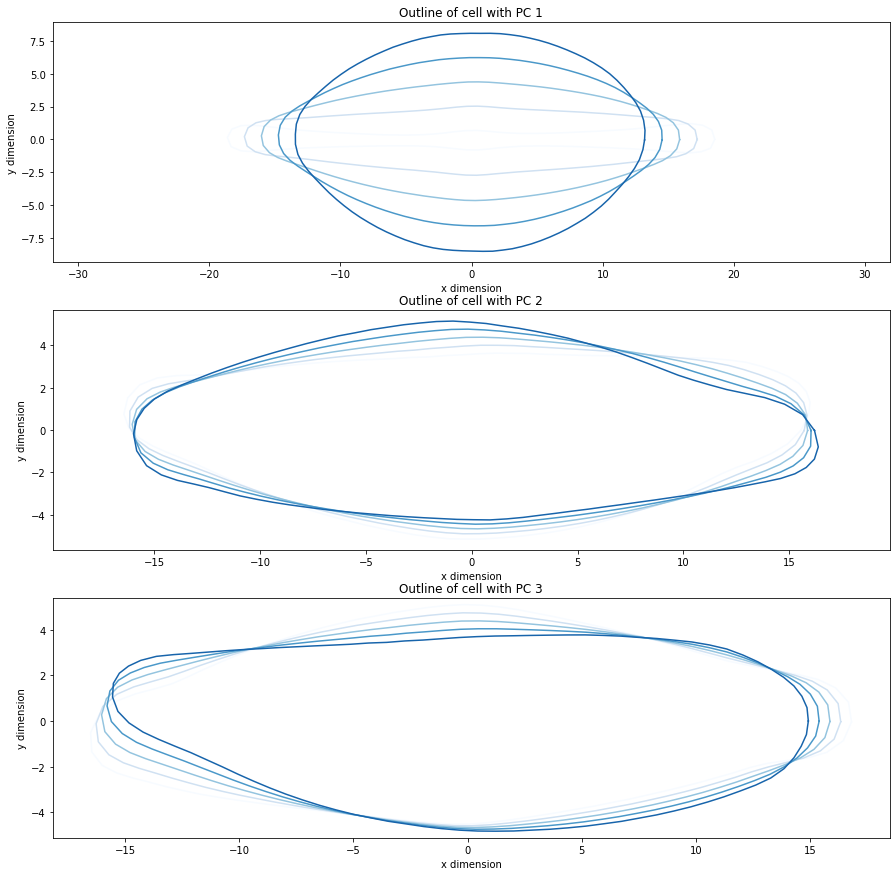

In [5]:
fig, ax = plt.subplots(3, 1)
fig.set_figheight(15)
fig.set_figwidth(15)
blues = plt.get_cmap('Blues')

eigval, eigvec, m = pca(dataDia)
sig_val = -2

for i in range(3):
    sigma = np.sqrt(eigval[i])
    for j in range(0, 10, 2):
        curr_x_vec = m[0::2]+(sig_val*sigma*eigvec[0::2,i])
        curr_y_vec = m[1::2]+(sig_val*sigma*eigvec[1::2,i])
        ax[i].plot(np.append(curr_x_vec, curr_x_vec[0]), np.append(curr_y_vec, curr_y_vec[0]), color=blues(j/10));
        ax[i].axis('equal')
        ax[i].set_ylabel('y dimension');
        ax[i].set_xlabel('x dimension');
        ax[i].set_title(f'Outline of cell with PC {i+1}')
        sig_val += 1
    sig_val = -2

# Exercise 3 (Critical thinking, 10 points).
a) (5 points) Assume that you perform each of the following preprocessing steps prior to performing
PCA. What is the effect on the PCA result? Is it a good idea?

i) Centering > already centered 

ii) Standardization > bad 

iii) Whitening > (==remove redunant datapoints) doesn't make any sense since we need every datapoint

b) (5 points) On the PCA toy dataset, run PCA and visualize the projection onto the first 2 PCs,
as in the previous assignment. Repeat the procedure and leave out the last 2 datapoints. You
should see a dramatic difference in result. Do you see the hidden structure? What happened?
In this exercise, if you have not implemented PCA as part of Assignment 2, it is OK to use a
pre-implemented version from e.g. scikit-learn.

Deliverables. a) Three short arguments, b) two dataset plots and an explanation.

In [13]:
def mds(data, d):
    variance, components, mean = pca(data)
    components = components[:,:d]
    
    matrix = np.dot(data, components)    
    return matrix

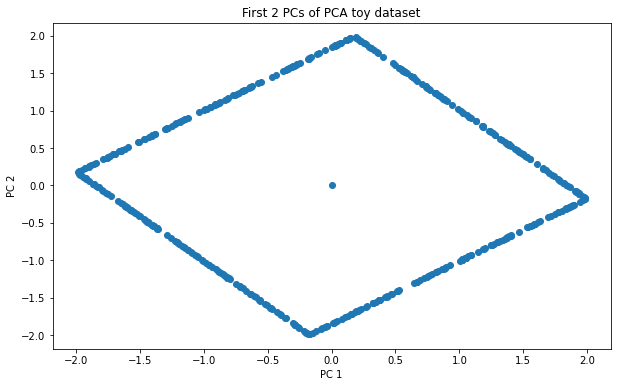

In [14]:
matrix = mds(dataToy, 2)
plt.scatter(matrix[:,0], matrix[:,1]);
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('First 2 PCs of PCA toy dataset')
plt.show();

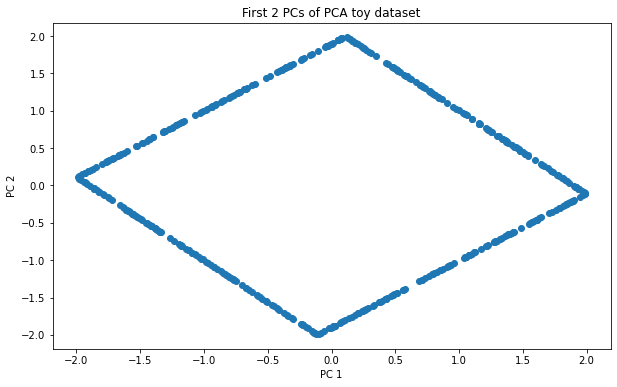

In [15]:
matrix = mds(dataToy[:-2], 2)
plt.scatter(matrix[:,0], matrix[:,1]);
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('First 2 PCs of PCA toy dataset')
plt.show();

# Clustering II
This exercise continues Exercise 2 and Exercise 3 from the previous Assignment 3.
In Exercise 2 from Assignment 3, you were asked to perform PCA on IDSWeedCropTrain.csv and
to visualize the data by projecting it on the first two 2 principal components. In Exercise 3 from
Assignment 3, you were asked to cluster the training data in IDSWeedCropTrain.csv using k-means
clustering with k = 2 using the first two data points in IDSWeedCropTrain.csv as starting points.
Now we bring these two exercises together. You are suppose to visualize the cluster centres.

# Exercise 4 (Clustering II, 10 points). 
Visualize the data in IDSWeedCropTrain.csv by projecting
it onto its first principal components (as in Exercise 2 from Assignment 3). Colour the data points
according to their class. Take the centres you found in Exercise 3 from Assignment 3 (2-means
clustering of the input data in IDSWeedCropTrain.csv, the cluster centres initialized with the first
two data points). Then project the centres onto the first two principal components found in the
previous step and visualize them together with the data points (i.e., in the same plot). Briefly discuss
whether you got meaningful clusters.

Deliverables. Description of software used; projection of the two cluster centres (i.e., two twodimensional vectors), a 2D plot visualizing the data and the cluster centres, short discussion of results

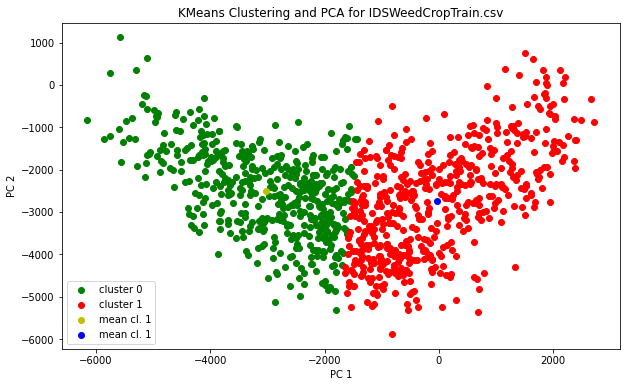

In [11]:
from sklearn.cluster import KMeans

startingPoint = np.vstack((XTrain[0,], XTrain[1,]))
kmeans = KMeans (n_clusters=2, random_state=42, algorithm='full', n_init=1, init=startingPoint)
kmeans.fit(XTrain)
clusters = kmeans.labels_

pca_weed = mds(XTrain, 2)
x_weed = pca_weed[:,0]
y_weed = pca_weed[:,1]

idx0 = np.where(clusters==0)
idx1 = np.where(clusters==1)
plt.scatter(x_weed[idx0], y_weed[idx0], color='g', label='cluster 0');
plt.scatter(x_weed[idx1], y_weed[idx1], color='r', label='cluster 1');
plt.scatter(np.mean(x_weed[idx0]), np.mean(y_weed[idx0]), color='y', label='mean cl. 1');
plt.scatter(np.mean(x_weed[idx1]), np.mean(y_weed[idx1]), color='b', label='mean cl. 1');
plt.legend();
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('KMeans Clustering and PCA for IDSWeedCropTrain.csv');

# normalized

# Exercise 5 (Clustering III, 10 points). 
Perform 2-means clustering on the occupancy_data.csv and
report the center values as you did in exercise 3 of Assignment 3 with the crop dataset. Initialise
you 2-means the same way. Visualise the data in occupancy_data.csv by projecting it onto its first
principal components (as in Exercise 2 from Assignment 3). Colour the data points according to their
class. Take the centres you found above and project them onto the first two principal components
found in the previous step and visualize them together with the data points (i.e., in the same plot).
Briefly discuss whether you got meaningful clusters.

Deliverables. Description of software used;projection of the two cluster centres (i.e., two two-dimensional
vectors), a 2D plot visualizing the data and the cluster centres, short discussion of results

cluster centers:
[[2.65302232e+04 2.06088809e+01 2.57658083e+01 2.21864003e+02
  6.58535583e+02 3.86307582e-03]
 [6.24189851e+04 2.13953191e+01 2.66567951e+01 2.67506035e+02
  8.74386475e+02 4.21061533e-03]]


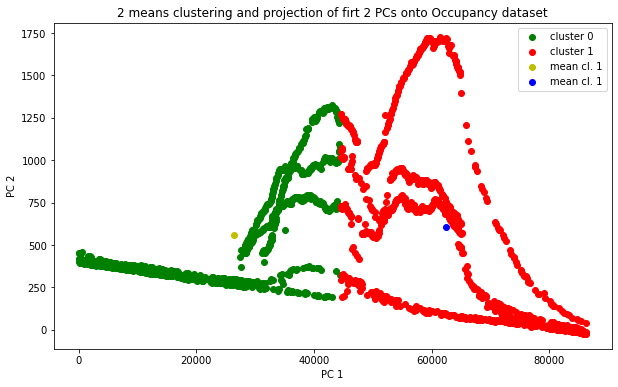

In [12]:
startingPoint = np.vstack((dataOccu[0,], dataOccu[1,]))
kmeans = KMeans (n_clusters=2, random_state=42, algorithm='full', n_init=1, init=startingPoint)
kmeans.fit(dataOccu)
clusters = kmeans.labels_
print(f'cluster centers:\n{kmeans.cluster_centers_}')

pca_occ = mds(dataOccu, 2)
x_occ = pca_occ[:,0]
y_occ = pca_occ[:,1]

idx0 = np.where(clusters==0)
idx1 = np.where(clusters==1)
plt.scatter(x_occ[idx0], y_occ[idx0], color='g', label='cluster 0');
plt.scatter(x_occ[idx1], y_occ[idx1], color='r', label='cluster 1');
plt.scatter(np.mean(x_occ[idx0]), np.mean(y_occ[idx0]), color='y', label='mean cl. 1');
plt.scatter(np.mean(x_occ[idx1]), np.mean(y_occ[idx1]), color='b', label='mean cl. 1');
plt.legend();
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('2 means clustering and projection of firt 2 PCs onto Occupancy dataset');

# Exercise 6 (Virtual Chocolate Box (no points)). 
Using Matplotlib3d, redo the previous visualisation for the data in occupancy_data.csv by projecting it onto their 3 first principal components,
colouring each point by the corresponding cluster and display the k-means data centres. Then display
the data again (separately) but this time colour it by the true class labels of the data. Deliverables.
Description of the software. Short discussion of results.